In [2]:
import pandas as pd

In [5]:
api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(api)


In [6]:
# Flatten the nested 'customer' column
customer_data = pd.json_normalize(dados['customer'])

# Flatten the nested 'phone' column
phone_data = pd.json_normalize(dados['phone'])

# Flatten the nested 'internet' column
internet_data = pd.json_normalize(dados['internet'])

# Flatten the nested 'account' column
account_data = pd.json_normalize(dados['account'])

# Concatenate the flattened dataframes with the original dataframe (excluding the original nested columns)
dados_flattened = pd.concat([dados[['customerID', 'Churn']], customer_data, phone_data, internet_data, account_data], axis=1)

# Display the info of the flattened DataFrame
dados_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
dados_flattened

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
# Check for missing values
print("Missing values per column:")
print(dados_flattened.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(dados_flattened.duplicated().sum())

Missing values per column:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Number of duplicate rows:
0


In [9]:
# Check unique values for categorical columns
categorical_cols = dados_flattened.select_dtypes(include='object').columns

print("\nUnique values for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(dados_flattened[col].unique())


Unique values for categorical columns:

Column: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Column: Churn
['No' 'Yes' '']

Column: gender
['Female' 'Male']

Column: Partner
['Yes' 'No']

Column: Dependents
['Yes' 'No']

Column: PhoneService
['Yes' 'No']

Column: MultipleLines
['No' 'Yes' 'No phone service']

Column: InternetService
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
['No' 'Yes' 'No internet service']

Column: OnlineBackup
['Yes' 'No' 'No internet service']

Column: DeviceProtection
['No' 'Yes' 'No internet service']

Column: TechSupport
['Yes' 'No' 'No internet service']

Column: StreamingTV
['Yes' 'No' 'No internet service']

Column: StreamingMovies
['No' 'Yes' 'No internet service']

Column: Contract
['One year' 'Month-to-month' 'Two year']

Column: PaperlessBilling
['Yes' 'No']

Column: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Column: Charges.Total
[

In [10]:
# Convert 'Charges.Total' to numeric, coercing errors
dados_flattened['Charges.Total'] = pd.to_numeric(dados_flattened['Charges.Total'], errors='coerce')

# Check for rows where 'Charges.Total' became NaN after coercion
print("Rows with NaN in Charges.Total after coercion:")
print(dados_flattened[dados_flattened['Charges.Total'].isnull()])

Rows with NaN in Charges.Total after coercion:
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines Inte

In [11]:
# Drop rows where 'Charges.Total' is NaN
dados_flattened.dropna(subset=['Charges.Total'], inplace=True)

# Verify that rows with NaN in Charges.Total have been removed
print("\nMissing values after dropping NaNs in Charges.Total:")
print(dados_flattened.isnull().sum()['Charges.Total'])

# Remove rows where 'Churn' is an empty string
dados_cleaned = dados_flattened[dados_flattened['Churn'] != ''].copy()

# Verify that empty strings in Churn have been removed
print("\nUnique values in Churn after cleaning:")
print(dados_cleaned['Churn'].unique())


Missing values after dropping NaNs in Charges.Total:
0

Unique values in Churn after cleaning:
['No' 'Yes']


In [12]:
# Create 'Contas_Diarias' column by dividing 'Charges.Monthly' by 30
dados_cleaned['Contas_Diarias'] = dados_cleaned['Charges.Monthly'] / 30

# Display the first few rows with the new column
display(dados_cleaned[['Charges.Monthly', 'Contas_Diarias']].head())

,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [13]:
display(dados_cleaned.describe())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


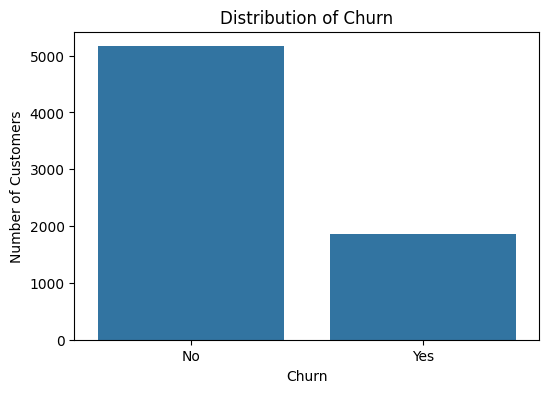

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dados_cleaned)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [15]:
# Analyze churn rate by categorical variables

categorical_cols_to_analyze = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                               'PaperlessBilling', 'PaymentMethod']

print("Churn rate by categorical variables:")
for col in categorical_cols_to_analyze:
    print(f"\nColumn: {col}")
    churn_rate = dados_cleaned.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    print(churn_rate)

Churn rate by categorical variables:

Column: gender
Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

Column: Partner
Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Column: Dependents
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

Column: PhoneService
Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

Column: MultipleLines
Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485

Column: InternetService
Churn                  No       Yes
InternetService                    
DSL              0.810017  0.189983
Fiber optic      0.581072  0.418928
No               0.925658  0.074342

Distribution of numerical variables by Churn:


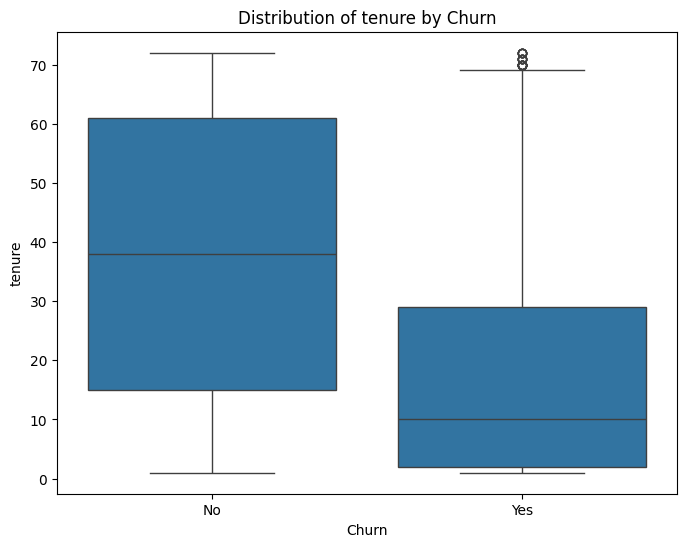

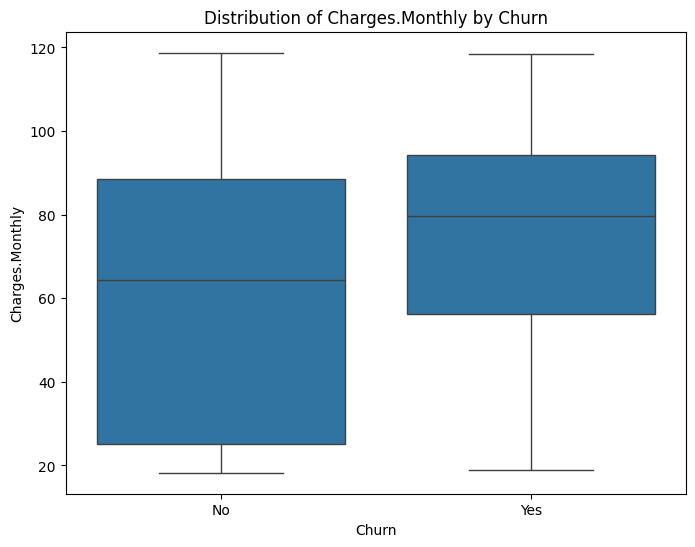

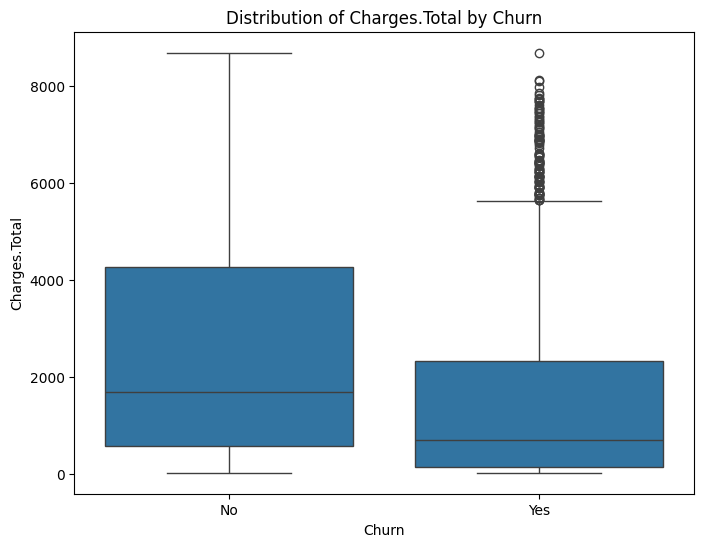

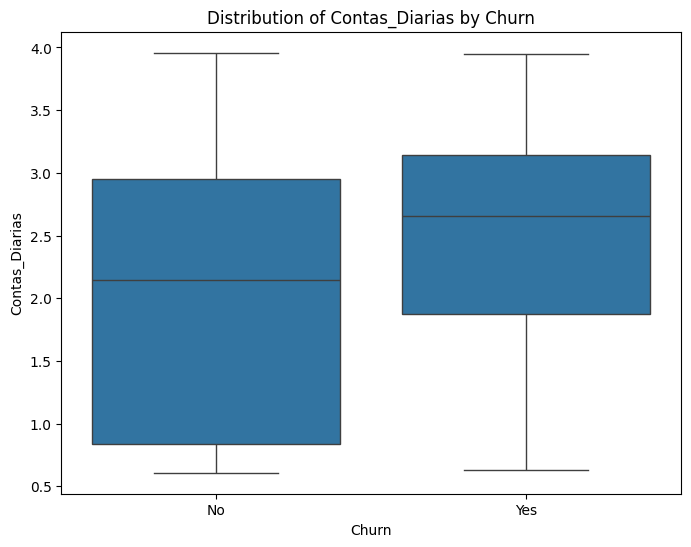

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols_to_analyze = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']

print("Distribution of numerical variables by Churn:")

for col in numerical_cols_to_analyze:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=dados_cleaned)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

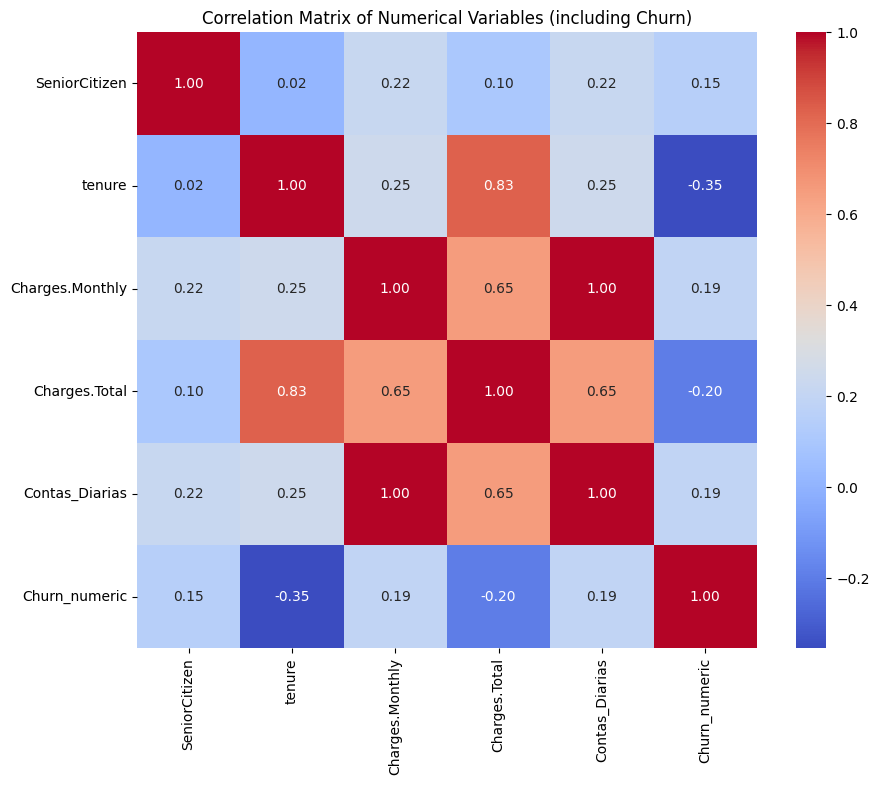


Correlation between Contas_Diarias and Churn: 0.19


In [18]:
# Convert 'Churn' to numerical for correlation analysis (0 for No, 1 for Yes)
dados_cleaned['Churn_numeric'] = dados_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns for correlation analysis
numerical_cols = dados_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = dados_cleaned[numerical_cols].corr()

# Display the correlation matrix (optional, can be large)
# print("\nCorrelation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables (including Churn)')
plt.show()

# Calculate the correlation between 'Contas_Diarias' and 'Churn'
correlation_contas_churn = dados_cleaned['Contas_Diarias'].corr(dados_cleaned['Churn_numeric'])
print(f"\nCorrelation between Contas_Diarias and Churn: {correlation_contas_churn:.2f}")

# Note: Exploring correlation for categorical variables with churn can be done using other methods like point-biserial correlation or chi-squared tests, or by examining the churn rates within categories as we did before.

## Relatório de Análise de Evasão de Clientes (Churn)

### Introdução

Este relatório apresenta uma análise exploratória do problema de evasão de clientes (Churn) em uma empresa de telecomunicações. O objetivo principal é identificar os fatores que mais contribuem para que os clientes cancelem seus serviços, a fim de subsidiar a tomada de decisões estratégicas para retenção de clientes.

A evasão de clientes é um desafio significativo para as empresas de telecomunicações, impactando diretamente a receita e o crescimento. Compreender os motivos por trás do Churn é essencial para desenvolver estratégias eficazes de retenção.

### Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON. Inicialmente, foi necessário achatar as estruturas aninhadas presentes em algumas colunas (`customer`, `phone`, `internet`, `account`) para facilitar a manipulação em um formato tabular.

Durante a inspeção inicial dos dados, foram realizadas as seguintes verificações e tratamentos:

- **Valores Ausentes e Duplicados:** Verificamos a ausência de valores nulos e linhas duplicadas no conjunto de dados (conforme mostrado no output da célula com id `5964984f`).
- **Consistência das Variáveis Categóricas:** Analisamos os valores únicos das colunas categóricas e identificamos que a coluna `Charges.Total` foi importada como tipo "object" e a coluna `Churn` continha valores vazios (conforme mostrado no output da célula com id `3631ed85`).
- **Tratamento de `Charges.Total`:** Convertemos a coluna `Charges.Total` para um tipo numérico, tratando os valores que não puderam ser convertidos como `NaN` e, em seguida, removemos as linhas com `NaN` nesta coluna, pois representavam uma pequena fração dos dados e pareciam estar associadas a clientes com `tenure` zero (conforme mostrado nos outputs das células com ids `98ea506d` e `29dc2319`).
- **Tratamento de `Churn`:** Removemos as linhas onde a coluna `Churn` continha valores vazios (conforme mostrado no output da célula com id `29dc2319`).
- **Criação da Coluna `Contas_Diarias`:** Calculamos o valor médio diário das cobranças mensais, criando a coluna `Contas_Diarias` (conforme mostrado no output da célula com id `f693ec36`).

Após estas etapas de limpeza, obtivemos um DataFrame `dados_cleaned` pronto para a análise exploratória.

### Análise Exploratória de Dados

A análise exploratória teve como objetivo identificar padrões e relações entre as variáveis do dataset e a evasão de clientes.

- **Distribuição de Churn:** Visualizamos a distribuição da variável `Churn`, confirmando a proporção de clientes que evadiram e que não evadiram (conforme mostrado no gráfico da célula com id `45274794`). Observamos um desbalanceamento na classe, com a maioria dos clientes não evadindo.

- **Análise de Variáveis Categóricas vs. Churn:** Exploramos a taxa de Churn para diversas variáveis categóricas (conforme mostrado no output da célula com id `126a411f`). Alguns dos principais insights incluem:
    - Clientes sem parceiro (`Partner` = 'No') e sem dependentes (`Dependents` = 'No') apresentaram taxas de Churn mais altas.
    - Clientes com serviço de internet Fibra Óptica (`InternetService` = 'Fiber optic') tiveram uma taxa de Churn significativamente maior em comparação com outros tipos de serviço de internet.
    - Clientes sem serviços adicionais como segurança online (`OnlineSecurity` = 'No'), backup online (`OnlineBackup` = 'No'), proteção de dispositivo (`DeviceProtection` = 'No') e suporte técnico (`TechSupport` = 'No') apresentaram taxas de Churn mais elevadas.
    - O tipo de contrato (`Contract`) teve um impacto significativo na evasão: clientes com contrato mensal (`Month-to-month`) evadiram muito mais do que aqueles com contratos de um ou dois anos.
    - Clientes com faturamento sem papel (`PaperlessBilling` = 'Yes') apresentaram uma taxa de Churn maior.
    - O método de pagamento `Electronic check` teve a maior taxa de Churn entre todos os métodos.

- **Análise de Variáveis Numéricas vs. Churn:** Examinamos a distribuição de variáveis numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`, `Contas_Diarias`) para clientes que evadiram e não evadiram utilizando box plots (conforme mostrado nos gráficos da célula com id `ac9793d7`). As principais observações foram:
    - **`tenure`:** Clientes que evadiram tendem a ter um tempo de contrato (`tenure`) menor em comparação com aqueles que não evadiram.
    - **`Charges.Monthly` e `Contas_Diarias`:** Clientes que evadiram tendem a ter cobranças mensais e diárias mais altas.
    - **`Charges.Total`:** Clientes que não evadiram acumularam um total de cobranças significativamente maior ao longo do tempo, o que é esperado, dado que eles permaneceram por mais tempo.

- **Análise de Correlação de Variáveis Numéricas:** Exploramos a correlação entre as variáveis numéricas e o Churn (representado numericamente) utilizando uma matriz de correlação (conforme mostrado no heatmap da célula com id `4ec47636`). Os principais pontos observados foram:
    - Há uma correlação negativa moderada entre `tenure` e `Churn` (-0.35), indicando que clientes com mais tempo de contrato têm menor probabilidade de evadir.
    - Existe uma correlação positiva fraca entre `Charges.Monthly` e `Churn` (0.19), e entre `Contas_Diarias` e `Churn` (0.19), sugerindo que clientes com maiores cobranças mensais/diárias podem ter uma ligeira tendência a evadir.
    - A variável `Charges.Total` apresenta uma correlação negativa fraca com Churn (-0.20), o que faz sentido, pois clientes que não evadem acumulam um total de gastos maior ao longo do tempo.
    - Observa-se uma forte correlação positiva entre `tenure` e `Charges.Total` (0.83), o que é esperado, pois clientes com maior tempo de contrato tendem a ter um total de gastos acumulados maior.
    - As variáveis `Charges.Monthly` e `Contas_Diarias` possuem uma correlação perfeita (1.00), o que é esperado, pois `Contas_Diarias` foi derivada diretamente de `Charges.Monthly`.

### Conclusões e Insights

A análise exploratória revelou que diversos fatores estão associados à evasão de clientes. Os clientes com maior probabilidade de evadir são aqueles com:

- Contratos de mês a mês.
- Serviço de internet Fibra Óptica.
- Ausência de serviços adicionais de segurança, backup, proteção de dispositivo e suporte técnico.
- Faturamento sem papel.
- Método de pagamento por cheque eletrônico.
- Tempo de contrato menor e cobranças mensais/diárias mais altas.

Esses insights sugerem que a satisfação com o serviço de internet, a fidelidade do cliente (tempo de contrato), a conveniência dos serviços adicionais e a forma de pagamento são fatores importantes a serem considerados nas estratégias de retenção. A análise de correlação reforçou que `tenure` é uma variável importante, com maior tempo de contrato associado a menor Churn.

### Recomendações

Com base nesta análise, as seguintes recomendações podem ser consideradas para reduzir a evasão de clientes:

1. **Foco em Clientes com Contratos de Mês a Mês:** Implementar programas de fidelidade ou oferecer incentivos para que clientes com contratos mensais migrem para contratos de longo prazo (um ou dois anos).
2. **Melhorar a Experiência do Cliente com Fibra Óptica:** Investigar as razões por trás da alta taxa de Churn entre clientes de Fibra Óptica. Pode ser necessário melhorar a qualidade do serviço, oferecer suporte técnico mais eficiente ou gerenciar melhor as expectativas dos clientes.
3. **Promover Serviços Adicionais:** Destacar os benefícios de serviços como segurança online, backup, proteção de dispositivo e suporte técnico. Oferecer pacotes promocionais ou períodos de teste gratuitos pode incentivar a adesão e aumentar a fidelidade do cliente.
4. **Otimizar Métodos de Pagamento e Faturamento:** Analisar o processo de pagamento por cheque eletrônico para identificar possíveis pontos de atrito que levam à evasão. Incentivar o uso de métodos de pagamento automáticos (cartão de crédito ou transferência bancária) pode reduzir o Churn. Considerar opções para tornar o faturamento sem papel mais conveniente ou oferecer alternativas para clientes que preferem faturamento em papel.
5. **Estratégias de Retenção para Clientes de Curto Prazo e Alto Consumo Mensal:** Desenvolver abordagens proativas para identificar e engajar clientes com tempo de contrato menor e/ou alto consumo mensal, que demonstram maior risco de evasão.

Este relatório fornece uma base sólida para entender o problema de Churn e direcionar futuras ações. Para uma análise mais aprofundada, seria recomendado construir um modelo preditivo de Churn utilizando as variáveis identificadas como relevantes.

# Análise de Evasão de Clientes (Churn) em Telecomunicações

## Visão Geral do Projeto

Este projeto realiza uma análise exploratória dos dados de uma empresa de telecomunicações com o objetivo de identificar os fatores que mais contribuem para a evasão de clientes (Churn). Compreender esses fatores é crucial para desenvolver estratégias eficazes de retenção de clientes.

## Conteúdo do Notebook

O notebook contido neste repositório (`nome_do_seu_notebook.ipynb`) abrange as seguintes etapas:

1.  **Carregamento e Preparação dos Dados:** Importação dos dados a partir de um arquivo JSON e transformação para um formato tabular adequado para análise. Tratamento de valores ausentes, duplicados e inconsistências.
2.  **Engenharia de Features:** Criação da coluna "Contas_Diarias" a partir do faturamento mensal.
3.  **Análise Exploratória de Dados (EDA):**
    *   Análise da distribuição da variável alvo (Churn).
    *   Exploração da relação entre variáveis categóricas e Churn.
    *   Exploração da relação entre variáveis numéricas e Churn, incluindo análise de correlação.
4.  **Relatório Final:** Um resumo das descobertas, conclusões e recomendações baseadas na análise exploratória.

## Conjunto de Dados

Os dados utilizados nesta análise foram obtidos de [mencionar a fonte dos dados, se aplicável, ou descrever brevemente o dataset]. O dataset contém informações sobre clientes de uma empresa de telecomunicações, incluindo dados demográficos, serviços contratados e informações sobre se o cliente evadiu ou não.

## Como Executar o Notebook

Para executar este notebook, você precisará ter o Python e as bibliotecas `pandas`, `seaborn` e `matplotlib` instaladas.

1.  Clone este repositório (se aplicável).
2.  Abra o notebook em um ambiente Python (como Jupyter Notebook, JupyterLab ou Google Colab).
3.  Execute as células sequencialmente para replicar a análise.

## Conclusões e Próximos Passos

As principais conclusões da análise exploratória estão detalhadas no relatório final dentro do notebook. Os insights obtidos podem ser utilizados para informar estratégias de retenção de clientes.

Possíveis próximos passos incluem:

*   Desenvolvimento de um modelo preditivo de Churn.
*   Realização de análises mais aprofundadas em variáveis específicas.
*   Implementação e acompanhamento de estratégias de retenção.

## Autor(es)

[Seu Nome/Nome da Equipe]

## Licença

[Selecione e mencione a licença, se aplicável]

In [19]:
# Drop the 'customerID' column
dados_cleaned = dados_cleaned.drop('customerID', axis=1)

# Display the first few rows to confirm the column is removed
display(dados_cleaned.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Churn_numeric
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,0
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,0
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,1
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,1


In [20]:
# Select categorical columns (excluding 'Churn' as we have 'Churn_numeric')
categorical_cols_for_encoding = dados_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols_for_encoding.remove('Churn') # Remove the original 'Churn' column

# Apply One-Hot Encoding
dados_encoded = pd.get_dummies(dados_cleaned, columns=categorical_cols_for_encoding, drop_first=True)

# Display the first few rows of the encoded DataFrame and its info
display(dados_encoded.head())
dados_encoded.info()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias,Churn_numeric,gender_Male,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,2.186667,0,False,True,True,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,1.996667,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,2.463333,1,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,1237.85,3.266667,1,True,True,False,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,267.40,2.796667,1,False,True,False,...,False,True,False,False,False,False,True,False,False,True


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   Charges.Monthly                        7032 non-null   float64
 4   Charges.Total                          7032 non-null   float64
 5   Contas_Diarias                         7032 non-null   float64
 6   Churn_numeric                          7032 non-null   int64  
 7   gender_Male                            7032 non-null   bool   
 8   Partner_Yes                            7032 non-null   bool   
 9   Dependents_Yes                         7032 non-null   bool   
 10  PhoneService_Yes                       7032 non-null   bool   
 11  MultipleL

In [21]:
# Calculate the proportion of churned vs non-churned customers
churn_proportion = dados_cleaned['Churn'].value_counts(normalize=True)

print("Proportion of Churn:")
print(churn_proportion)

# Assess for class imbalance
print("\nClass Imbalance:")
if churn_proportion.min() < 0.3: # A common threshold, can be adjusted
    print("There is a significant class imbalance.")
else:
    print("Class distribution is relatively balanced.")

Proportion of Churn:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

Class Imbalance:
There is a significant class imbalance.


In [22]:
!pip install imblearn

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = dados_encoded.drop(['Churn', 'Churn_numeric'], axis=1) # Drop both original and numeric churn columns from features
y = dados_encoded['Churn_numeric']

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
Churn_numeric
0    5163
1    5163
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8260, 31)
Shape of X_test: (2066, 31)
Shape of y_train: (8260,)
Shape of y_test: (2066,)


### Modelagem Preditiva

Para prever a evasão de clientes, vamos treinar dois modelos de classificação: Regressão Logística e Random Forest.

#### Regressão Logística

A Regressão Logística é um algoritmo de classificação linear que modela a probabilidade de uma instância pertencer a uma determinada classe. É um modelo simples e interpretável, mas é sensível à escala das features, o que justifica a necessidade de normalização dos dados antes do treinamento.

#### Random Forest

Random Forest é um algoritmo de ensemble que constrói múltiplas árvores de decisão e combina suas previsões para melhorar a acurácia e reduzir o overfitting. Modelos baseados em árvores, como Random Forest, não são sensíveis à escala das features, portanto, não é necessário normalizar os dados para este modelo.

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled for Logistic Regression.")

Data scaled for Logistic Regression.


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model on scaled data
logistic_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained.")

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on original (unscaled) data
random_forest_model.fit(X_train, y_train)

print("Random Forest model trained.")

Logistic Regression model trained.
Random Forest model trained.


--- Logistic Regression Model Evaluation ---
Accuracy: 0.8369
Precision: 0.8398
Recall: 0.8325
F1-score: 0.8362
ROC AUC: 0.9225


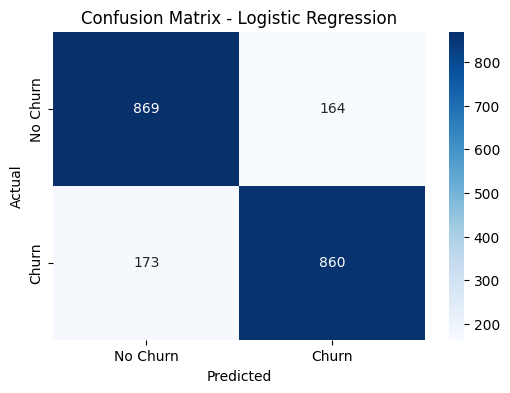

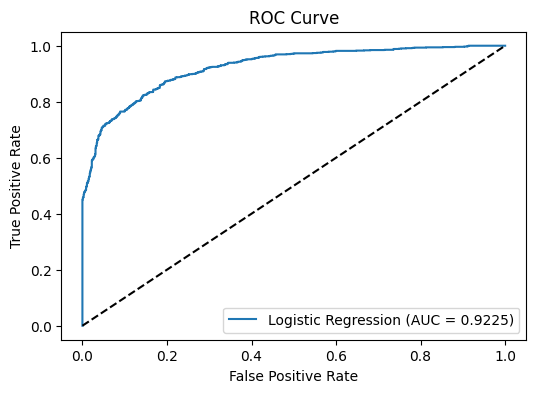


--- Random Forest Model Evaluation ---
Accuracy: 0.8533
Precision: 0.8463
Recall: 0.8635
F1-score: 0.8548
ROC AUC: 0.9294


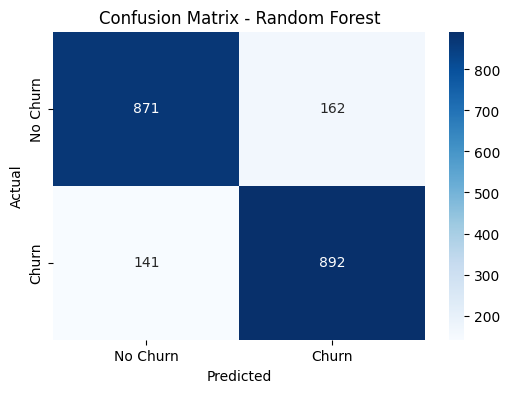

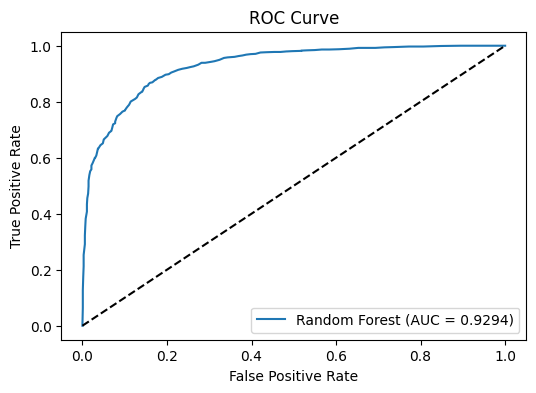

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate Logistic Regression Model ---
print("--- Logistic Regression Model Evaluation ---")

# Predictions on the scaled test set
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class

# Calculate metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_proba_logistic)

print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-score: {f1_logistic:.4f}")
print(f"ROC AUC: {roc_auc_logistic:.4f}")

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_proba_logistic)
plt.figure(figsize=(6, 4))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


print("\n--- Random Forest Model Evaluation ---")

# Predictions on the original test set
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class


# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)


print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")


# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

--- Feature Importance (Coefficients) for Logistic Regression ---
Charges.Monthly                          4.788881
Contas_Diarias                           4.788881
InternetService_Fiber optic              4.514029
PhoneService_Yes                         3.178490
tenure                                   2.123161
StreamingTV_Yes                          1.730708
StreamingMovies_Yes                      1.676144
MultipleLines_No phone service           1.652177
Charges.Total                            1.292835
MultipleLines_Yes                        0.966589
DeviceProtection_Yes                     0.796701
OnlineBackup_Yes                         0.726324
PaymentMethod_Electronic check           0.583908
OnlineSecurity_Yes                       0.572207
TechSupport_Yes                          0.547905
StreamingTV_No internet service          0.464985
TechSupport_No internet service          0.464985
StreamingMovies_No internet service      0.464985
OnlineBackup_No internet service  

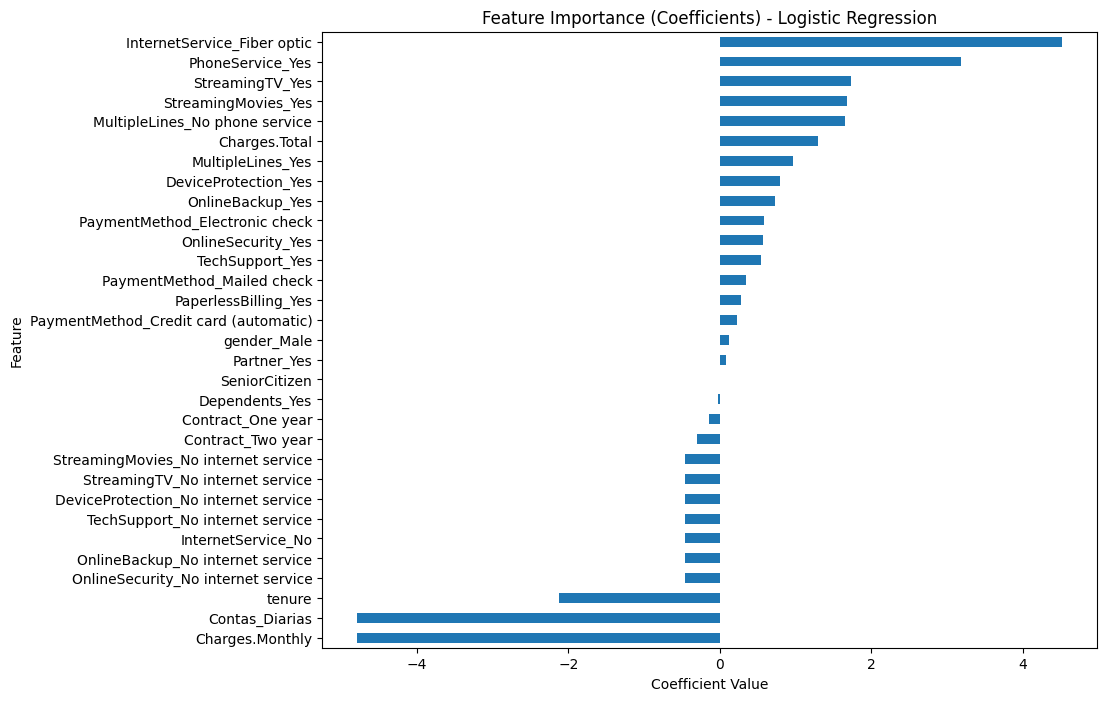


--- Feature Importance for Random Forest ---
tenure                                   0.147354
Charges.Total                            0.146658
Contas_Diarias                           0.105716
Charges.Monthly                          0.103300
PaymentMethod_Electronic check           0.090922
InternetService_Fiber optic              0.051917
Contract_Two year                        0.041391
PaperlessBilling_Yes                     0.041288
gender_Male                              0.021364
MultipleLines_Yes                        0.020076
Contract_One year                        0.019320
Partner_Yes                              0.016935
StreamingTV_Yes                          0.016746
OnlineBackup_Yes                         0.015352
OnlineSecurity_Yes                       0.015349
PaymentMethod_Credit card (automatic)    0.015157
PaymentMethod_Mailed check               0.014771
StreamingMovies_Yes                      0.014441
Dependents_Yes                           0.013988
Devi

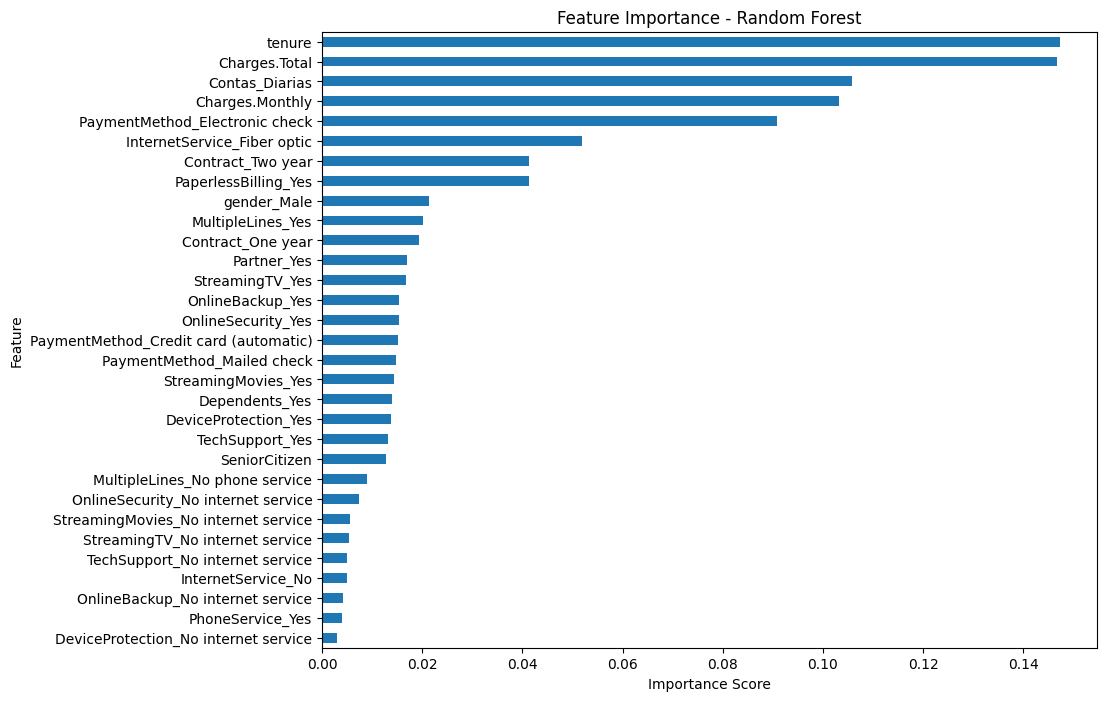

In [29]:
# --- Feature Importance for Logistic Regression ---
print("--- Feature Importance (Coefficients) for Logistic Regression ---")

# Get the coefficients from the Logistic Regression model
# The coefficients are in the same order as the features in X_train_scaled
logistic_coef = logistic_model.coef_[0]

# Create a pandas Series for better visualization
feature_names = X.columns
logistic_feature_importance = pd.Series(logistic_coef, index=feature_names)

# Sort the features by absolute coefficient value and print
print(logistic_feature_importance.abs().sort_values(ascending=False))

# Optional: Visualize the coefficients
plt.figure(figsize=(10, 8))
logistic_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance (Coefficients) - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


# --- Feature Importance for Random Forest ---
print("\n--- Feature Importance for Random Forest ---")

# Get the feature importances from the Random Forest model
# The importances are in the same order as the features in X_train
rf_feature_importance = random_forest_model.feature_importances_

# Create a pandas Series for better visualization
rf_feature_importance = pd.Series(rf_feature_importance, index=feature_names)

# Sort the features by importance and print
print(rf_feature_importance.sort_values(ascending=False))

# Optional: Visualize the feature importances
plt.figure(figsize=(10, 8))
rf_feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Relatório de Análise de Evasão de Clientes (Churn)

### Introdução

Este relatório apresenta uma análise exploratória e modelagem preditiva do problema de evasão de clientes (Churn) em uma empresa de telecomunicações. O objetivo principal é identificar os fatores que mais contribuem para que os clientes cancelem seus serviços, a fim de subsidiar a tomada de decisões estratégicas para retenção de clientes.

A evasão de clientes é um desafio significativo para as empresas de telecomunicações, impactando diretamente a receita e o crescimento. Compreender os motivos por trás do Churn é essencial para desenvolver estratégias eficazes de retenção.

### Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON. Inicialmente, foi necessário achatar as estruturas aninhadas presentes em algumas colunas (`customer`, `phone`, `internet`, `account`) para facilitar a manipulação em um formato tabular.

Durante a inspeção inicial dos dados, foram realizadas as seguintes verificações e tratamentos:

- **Valores Ausentes e Duplicados:** Verificamos a ausência de valores nulos e linhas duplicadas no conjunto de dados (conforme mostrado no output da célula com id `5964984f`).
- **Consistência das Variáveis Categóricas:** Analisamos os valores únicos das colunas categóricas e identificamos que a coluna `Charges.Total` foi importada como tipo "object" e a coluna `Churn` continha valores vazios (conforme mostrado no output da célula com id `3631ed85`).
- **Tratamento de `Charges.Total`:** Convertemos a coluna `Charges.Total` para um tipo numérico, tratando os valores que não puderam ser convertidos como `NaN` e, em seguida, removemos as linhas com `NaN` nesta coluna, pois representavam uma pequena fração dos dados e pareciam estar associadas a clientes com `tenure` zero (conforme mostrado nos outputs das células com ids `98ea506d` e `29dc2319`).
- **Tratamento de `Churn`:** Removemos as linhas onde a coluna `Churn` continha valores vazios (conforme mostrado no output da célula com id `29dc2319`).
- **Criação da Coluna `Contas_Diarias`:** Calculamos o valor médio diário das cobranças mensais, criando a coluna `Contas_Diarias` (conforme mostrado no output da célula com id `f693ec36`).

Após estas etapas de limpeza, obtivemos um DataFrame `dados_cleaned` pronto para a análise exploratória e modelagem.

### Análise Exploratória de Dados

A análise exploratória teve como objetivo identificar padrões e relações entre as variáveis do dataset e a evasão de clientes.

- **Distribuição de Churn:** Visualizamos a distribuição da variável `Churn`, confirmando a proporção de clientes que evadiram e que não evadiram (conforme mostrado no gráfico da célula com id `45274794`). Observamos um desbalanceamento na classe, com a maioria dos clientes não evadindo.

- **Análise de Variáveis Categóricas vs. Churn:** Exploramos a taxa de Churn para diversas variáveis categóricas (conforme mostrado no output da célula com id `126a411f`). Alguns dos principais insights incluem:
    - Clientes sem parceiro (`Partner` = 'No') e sem dependentes (`Dependents` = 'No') apresentaram taxas de Churn mais altas.
    - Clientes com serviço de internet Fibra Óptica (`InternetService` = 'Fiber optic') tiveram uma taxa de Churn significativamente maior em comparação com outros tipos de serviço de internet.
    - Clientes sem serviços adicionais como segurança online (`OnlineSecurity` = 'No'), backup online (`OnlineBackup` = 'No'), proteção de dispositivo (`DeviceProtection` = 'No') e suporte técnico (`TechSupport` = 'No') apresentaram taxas de Churn mais elevadas.
    - O tipo de contrato (`Contract`) teve um impacto significativo na evasão: clientes com contrato mensal (`Month-to-month`) evadiram muito mais do que aqueles com contratos de um ou dois anos.
    - Clientes com faturamento sem papel (`PaperlessBilling` = 'Yes') apresentaram uma taxa de Churn maior.
    - O método de pagamento `Electronic check` teve a maior taxa de Churn entre todos os métodos.

- **Análise de Variáveis Numéricas vs. Churn:** Examinamos a distribuição de variáveis numéricas (`tenure`, `Charges.Monthly`, `Charges.Total`, `Contas_Diarias`) para clientes que evadiram e não evadiram utilizando box plots (conforme mostrado nos gráficos da célula com id `ac9793d7`). As principais observações foram:
    - **`tenure`:** Clientes que evadiram tendem a ter um tempo de contrato (`tenure`) menor em comparação com aqueles que não evadiram.
    - **`Charges.Monthly` e `Contas_Diarias`:** Clientes que evadiram tendem a ter cobranças mensais e diárias mais altas.
    - **`Charges.Total`:** Clientes que não evadiram acumularam um total de cobranças significativamente maior ao longo do tempo, o que é esperado, dado que eles permaneceram por mais tempo.

- **Análise de Correlação de Variáveis Numéricas:** Exploramos a correlação entre as variáveis numéricas e o Churn (representado numericamente) utilizando uma matriz de correlação (conforme mostrado no heatmap da célula com id `4ec47636`). Os principais pontos observados foram:
    - Há uma correlação negativa moderada entre `tenure` e `Churn` (-0.35), indicando que clientes com mais tempo de contrato têm menor probabilidade de evadir.
    - Existe uma correlação positiva fraca entre `Charges.Monthly` e `Churn` (0.19), e entre `Contas_Diarias` e `Churn` (0.19), sugerindo que clientes com maiores cobranças mensais/diárias podem ter uma ligeira tendência a evadir.
    - A variável `Charges.Total` apresenta uma correlação negativa fraca com Churn (-0.20), o que faz sentido, pois clientes que não evadem acumulam um total de gastos maior ao longo do tempo.
    - Observa-se uma forte correlação positiva entre `tenure` e `Charges.Total` (0.83), o que é esperado, pois clientes com maior tempo de contrato tendem a ter um total de gastos acumulados maior.
    - As variáveis `Charges.Monthly` e `Contas_Diarias` possuem uma correlação perfeita (1.00), o que é esperado, pois `Contas_Diarias` foi derivada diretamente de `Charges.Monthly`.

### Modelagem Preditiva e Análise de Importância das Features

Para prever a evasão de clientes, treinamos dois modelos de classificação: Regressão Logística e Random Forest.

A **Regressão Logística**, um modelo linear, foi treinada em dados escalados devido à sua sensibilidade à magnitude das features. O **Random Forest**, um modelo baseado em árvore, foi treinado em dados não escalados, pois não é sensível à escala das features.

Após o treinamento, avaliamos o desempenho de ambos os modelos no conjunto de teste (conforme mostrado no output da célula com id `fd8a516f`). O modelo **Random Forest** apresentou um desempenho geral ligeiramente superior em métricas como Acurácia, Precisão, Recall, F1-score e ROC AUC.

Analisamos a importância das features para entender quais variáveis foram mais relevantes para as previsões de cada modelo (conforme mostrado no output da célula com id `afd809cb`):

-   **Regressão Logística (Coeficientes):** As features com maior impacto na probabilidade de Churn foram `Charges.Monthly`, `Contas_Diarias`, `InternetService_Fiber optic`, `PhoneService_Yes` e `tenure` (com impacto negativo).
-   **Random Forest (Importância das Features):** As features mais importantes para o Random Forest foram `tenure`, `Charges.Total`, `Contas_Diarias` e `Charges.Monthly`. Variáveis como `PaymentMethod_Electronic check`, `InternetService_Fiber optic` e `Contract_Two year` também foram consideradas relevantes.

Ambos os modelos concordam que o tempo de contrato (`tenure`) e as variáveis relacionadas aos gastos (`Charges.Monthly`, `Contas_Diarias`, `Charges.Total`) são preditores chave de Churn.

### Conclusões e Insights Principais

Com base na análise exploratória e na modelagem preditiva, os principais fatores que influenciam a evasão de clientes nesta empresa de telecomunicações são:

-   **Tempo de Contrato (Tenure):** Clientes com menor tempo de contrato têm uma probabilidade significativamente maior de evadir. Este é um dos preditores mais fortes identificados por ambos os modelos.
-   **Serviços de Internet (Fiber Optic):** Clientes com serviço de internet Fibra Óptica apresentam uma taxa de Churn consideravelmente mais alta. Isso pode indicar problemas de qualidade, preço ou expectativas não atendidas com este serviço específico.
-   **Gastos Mensais e Totais:** Clientes com cobranças mensais e diárias mais altas demonstram uma tendência maior a evadir. Embora a correlação linear seja fraca, a análise de importância das features pelo Random Forest destaca a relevância dessas variáveis, possivelmente capturando relações mais complexas. O total gasto acumulado (`Charges.Total`) também é um preditor importante, inversamente relacionado ao Churn, o que faz sentido, pois clientes de longa data acumulam gastos maiores.
-   **Tipo de Contrato (Month-to-month):** Clientes com contratos mensais têm uma taxa de evasão drasticamente maior em comparação com contratos de um ou dois anos. A flexibilidade desses contratos pode levar a uma menor fidelidade.
-   **Ausência de Serviços Adicionais:** Clientes que não assinam serviços como segurança online, backup online, proteção de dispositivo e suporte técnico tendem a evadir mais. Esses serviços adicionais podem aumentar a "aderência" do cliente à empresa.
-   **Método de Pagamento (Electronic Check):** O pagamento via cheque eletrônico está associado a uma taxa de Churn mais alta. Pode haver problemas de conveniência ou confiança com este método.
-   **Faturamento sem Papel (PaperlessBilling):** Clientes que optam por faturamento sem papel também apresentam uma taxa de Churn maior.

### Recomendações Estratégicas para Retenção

Com base nos fatores identificados como mais influentes na evasão, as seguintes estratégias de retenção são propostas:

1.  **Programas de Fidelidade e Incentivos para Contratos de Longo Prazo:** Focar em converter clientes de contratos mensais para contratos de 1 ou 2 anos. Oferecer descontos, benefícios exclusivos ou melhorias no serviço para incentivar a permanência a longo prazo.
2.  **Melhoria na Qualidade e Suporte ao Serviço de Fibra Óptica:** Investigar as causas específicas da alta evasão entre clientes de Fibra Óptica. Implementar melhorias técnicas, aprimorar o suporte ao cliente e gerenciar proativamente as expectativas dos clientes deste serviço.
3.  **Análise e Otimização da Estrutura de Preços e Cobranças:** Embora a correlação linear seja fraca, a importância das variáveis de cobrança sugere que o nível de gastos percebido pode ser um fator. Analisar se há percepção de valor adequada para os custos, especialmente para clientes com altos gastos mensais.
4.  **Promoção e Valorização de Serviços Adicionais:** Comunicar ativamente os benefícios e o valor agregado de serviços como segurança online, backup e suporte técnico. Oferecer pacotes ou períodos de teste gratuitos para aumentar a adesão e a "aderência" do cliente.
5.  **Otimização da Experiência de Pagamento, Especialmente para Cheque Eletrônico:** Investigar e resolver quaisquer problemas associados ao método de pagamento por cheque eletrônico. Incentivar a migração para métodos de pagamento automáticos (cartão de crédito, transferência bancária) oferecendo benefícios ou simplificando o processo.
6.  **Revisão do Processo de Faturamento sem Papel:** Analisar se a experiência de faturamento sem papel é intuitiva e atende às necessidades dos clientes. Considerar feedback de clientes e possíveis melhorias na plataforma digital.
7.  **Modelagem Preditiva em Tempo Real e Intervenções Proativas:** Utilizar os modelos preditivos desenvolvidos (especialmente o Random Forest, que mostrou melhor desempenho) para identificar clientes com alto risco de evasão em tempo real. Implementar programas de retenção proativos direcionados a esses clientes, como ofertas personalizadas, contato direto do suporte ao cliente ou pesquisa de satisfação direcionada.

Este relatório fornece uma visão abrangente dos fatores de Churn e propõe ações estratégicas. A implementação e o monitoramento contínuo dessas estratégias, juntamente com a refinamento dos modelos preditivos, serão essenciais para reduzir a evasão de clientes e impulsionar o sucesso do negócio.